### Recognising HandWritten Digits on MNIST dataset using KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step1: Data Preparation

In [2]:
df = pd.read_csv("Dataset/mnist_train.csv")
print(df.shape)

(60000, 785)


In [5]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [6]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = df.values #creates a numpy array from pandas dataframe
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [8]:
X = data[:,1:]
Y = data[:,0]
print(X.shape, Y.shape)

(60000, 784) (60000,)


In [10]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


In [16]:
# Visualise some samples
def drawImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap = "gray")
    plt.show()

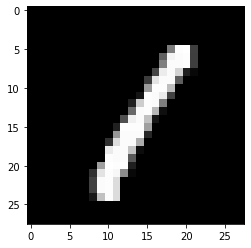

1


In [17]:
drawImage(X_train[3])
print(Y_train[3])

### Step2: Apply KNN to predict classes i.e. 0-9

In [36]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query_pt,k=5):
    vals= []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(query_pt,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

### Make Predictions

In [39]:
pred = knn(X_train,Y_train,X_test[2])
print(int(pred))

8


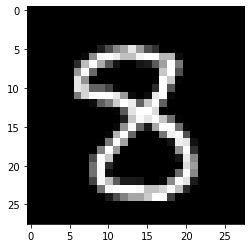

8


In [40]:
drawImage(X_test[2])
print(Y_test[2])

0


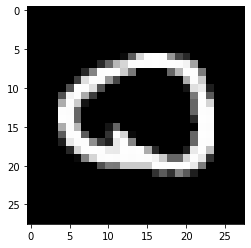

0


In [46]:
t = 1200
pred = knn(X_train,Y_train,X_test[t])
print(int(pred))
drawImage(X_test[t])
print(Y_test[t])

## Write one method whcih computes accuracy of knn over the test set

In [72]:
def accuracy(count=X_test.shape[0]):
    correct = 0
    for i in range(count):
        if knn(X_train,Y_train,X_test[i]) == Y_test[i]:
            correct+=1
        if (i+1)%5 == 0:
            print("Checked {} test cases".format(i+1))
            print("Current accuracy ="+str((correct*100)/(i+1)))
            print()
    return "Final Accuracy = "+str((correct*100)/count)

In [73]:
print(accuracy(100))

Checked 5 test cases
Current accuracy =100.0

Checked 10 test cases
Current accuracy =100.0

Checked 15 test cases
Current accuracy =100.0

Checked 20 test cases
Current accuracy =100.0

Checked 25 test cases
Current accuracy =96.0

Checked 30 test cases
Current accuracy =96.66666666666667

Checked 35 test cases
Current accuracy =97.14285714285714

Checked 40 test cases
Current accuracy =97.5

Checked 45 test cases
Current accuracy =97.77777777777777

Checked 50 test cases
Current accuracy =98.0

Checked 55 test cases
Current accuracy =98.18181818181819

Checked 60 test cases
Current accuracy =98.33333333333333

Checked 65 test cases
Current accuracy =98.46153846153847

Checked 70 test cases
Current accuracy =97.14285714285714

Checked 75 test cases
Current accuracy =96.0

Checked 80 test cases
Current accuracy =96.25

Checked 85 test cases
Current accuracy =96.47058823529412

Checked 90 test cases
Current accuracy =96.66666666666667

Checked 95 test cases
Current accuracy =96.84210526